In [1]:
import sys        
sys.path.append('/Users/customer/VRI_package')   

import rip_2DIm as D2
import common_functions as cf
import rip_hyper as hs
import PreProcessing as PP

import rip_rearrange as rr
import PreProcessing as PP
from PreProcessing import smoothTriangle
import VolumeRaman as VRI
import Clustering as Cluster

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
from matplotlib.colors import ListedColormap

In [3]:
name = 'SmSq_3 - CR - Nf - Bc - Nm.txt'
w = cf.one_variable(name).waves()
data = cf.one_variable(name).DataMat()

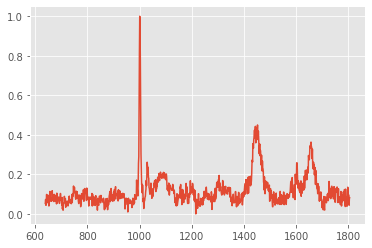

In [4]:
plt.plot(w[::-1],data[15][::-1])
plt.show()

In [5]:
cmap_KM = ListedColormap(["blue", "red", "green", "yellow","orange"])

In [6]:
df = Cluster.Kmeans_cluster_VRI(name, data, 5)

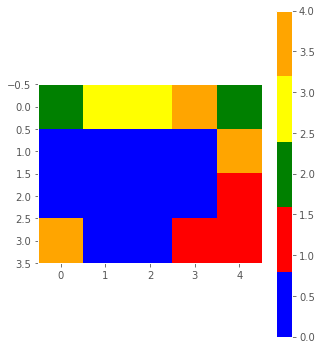

In [7]:
plt.figure(figsize=(5,6))
plt.imshow(df,cmap_KM)
plt.grid(False)
plt.colorbar()
plt.show()

In [8]:
labels = Cluster.Kmeans_labels(data, 5).rename(columns={0:'Labels'})
spectra = pd.DataFrame(data)
X = pd.concat([labels,spectra],axis=1).set_index('Labels')

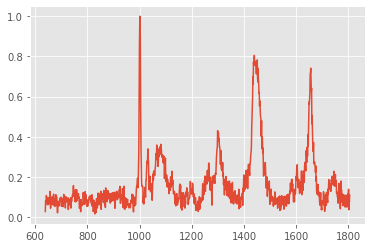

In [16]:
i = 1
plt.plot(w,np.array(X.loc[i].mean()))

In [18]:
d0 = X.loc[0]
d2 = X.loc[2]
d3 = X.loc[3]
d4 = X.loc[4]


fdf = pd.concat([d0,d2,d3,d4],axis=0)
data2 = np.array(fdf)[::-1]

In [20]:
import random as rand
n_1, n_2, n_3 = rand.randrange(len(data2)), rand.randrange(len(data2)), rand.randrange(len(data2))
print(n_1)
print(n_2)
print(n_3)

6
4
0


In [21]:
d_1 = data2[n_1,::-1]
d_2 = data2[n_2,::-1]
data_1 = pd.DataFrame(data2[n_1,::-1])
data_2 = pd.DataFrame(data2[n_2,::-1])
data_3 = pd.DataFrame(data2[n_3,::-1])
data_4 = pd.DataFrame([d_1, d_2]).mean()

d_5 = pd.DataFrame(data2).mean()
d_5_2 = np.array(d_5)[::-1]
data_5 = pd.DataFrame(d_5_2)

In [22]:
data_5.shape

(1015, 1)

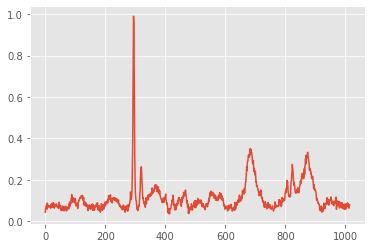

In [23]:
plt.plot(data_5)

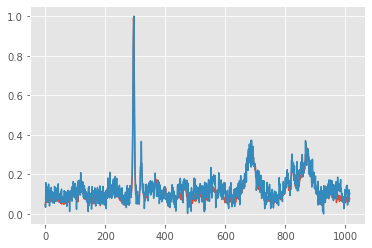

In [24]:
plt.figure()
plt.plot(data_5)
plt.plot(data_1)

In [25]:
df = pd.concat([data_1,data_2,data_3,data_4,data_5],axis=1).T.reset_index(drop=True)

In [26]:
df.shape

(5, 1015)

In [27]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
0,0.045144,0.033898,0.157908,0.128228,0.095445,0.128945,0.063879,0.127882,0.058253,0.137064,...,0.110716,0.144975,0.044889,0.080321,0.104675,0.118677,0.072439,0.121816,0.095838,0.104019
1,0.106601,0.114020,0.089397,0.128011,0.153347,0.106606,0.139092,0.117921,0.137640,0.090232,...,0.169094,0.156556,0.139685,0.198451,0.087063,0.094553,0.099402,0.155779,0.114741,0.169914


In [28]:
len(df)

5

In [29]:
labels = []
for i in range(0,len(df)):
    labels.append('SmSq')

lbs = pd.DataFrame(labels).rename(columns={0:'Labels'})

In [30]:
lbs

,Labels
0,SmSq
1,SmSq
2,SmSq
3,SmSq
4,SmSq


In [31]:
df.shape

(5, 1015)

In [32]:
DataFrame = pd.concat([lbs,df],axis=1)

In [33]:
DataFrame

,Labels,0,1,2,3,4,5,6,7,8,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
0,SmSq,0.045144,0.033898,0.157908,0.128228,0.095445,0.128945,0.063879,0.127882,0.058253,...,0.110716,0.144975,0.044889,0.080321,0.104675,0.118677,0.072439,0.121816,0.095838,0.104019
1,SmSq,0.106601,0.114020,0.089397,0.128011,0.153347,0.106606,0.139092,0.117921,0.137640,...,0.169094,0.156556,0.139685,0.198451,0.087063,0.094553,0.099402,0.155779,0.114741,0.169914
2,SmSq,0.053285,0.073040,0.043557,0.061741,0.098508,0.056231,0.070256,0.075724,0.095079,...,0.060668,0.069596,0.135161,0.095344,0.070086,0.097253,0.080082,0.044061,0.080109,0.081476
3,SmSq,0.075872,0.073959,0.123652,0.128119,0.124396,0.117776,0.101485,0.122901,0.097947,...,0.139905,0.150765,0.092287,0.139386,0.095869,0.106615,0.085921,0.138798,0.105290,0.136966
4,SmSq,0.042614,0.058045,0.066170,0.073434,0.075302,0.080144,0.057848,0.086895,0.076045,...,0.074941,0.075073,0.087483,0.085404,0.067934,0.082073,0.066004,0.062004,0.073803,0.077795


In [34]:
DataFrame.to_csv(name+' DataFrame.csv')